# **Part1**
### **프로젝트의 목표**
 풀고자 하는 문제가 명확하게 제시되었다.

 이 문제를 푸는 것이 왜 가치가 있는지 명확히 제시되었다.

### **데이터셋 선정**
 부트캠프 내 데이터셋이 아닌 다른 데이터셋을 활용하였다.

 데이터셋을 선정한 근거가 드러나 있다.

### **머신러닝 문제 정의**
 부트캠프 내 문제가 아닌 다른 문제를 정의하고 데이터셋으로부터 문제(회귀 or 분류) 정의 과정을 제시하였다.

 문제 정의에 따른 적절한 타겟을 설정하였다.

 문제를 풀기위해 너무 뻔하지 않은 적절한 가설을 잘 세웠다.

### **EDA&전처리**
 데이터 분석 과정과 결과 설명이 발표에 나타나 있다.

 데이터를 살펴보고 전처리를 한 과정을 설명하였다.

 EDA를 통해 가설의 타당성을 설명하였다.

# **Part 2**
### **모델 학습 및 검증**
 모델링 이전에 미리 baseline 모델을 선정하였다.

 문제 정의에서 언급한 회귀 / 분류 문제에 맞는 모델을 선택하였다.

 [+] 선택한 모델의 작동 원리 또는 주의할 점 등의 설명을 포함하였다.
 
 회귀/분류 문제에 따른 적절한 평가지표를 선택하였다.

 2개 이상의 평가지표를 사용하였다.

 [+] 평가지표의 해석법이나 사용 이유 등을 발표에 포함하였다.

 교차검증이나 hold-out을 사용해 데이터셋을 분리하고 모델의 성능 비교 및 향상을 위해 검증 데이터셋을 활용했다.

 모델 최적화를 위한 하이퍼파라미터 튜닝을 진행하였다.

 [+] 비교하고자 하는 하이퍼파라미터의 역할에 대해 이해하고 발표에서 설명하였다.
 모델 결과로서 Test Score(일반화 성능)를 제시하여 모델을 평가하였다.

 테스트셋은 모델의 일반화 성능을 평가하기 위해 한 번만 사용했다.

### **모델 해석**
 PDP/SHAP/Feature Importance 등을 활용하여 모델 작동을 설명하였다.

 모델 학습 결과에 대한 논리적 해석이 드러나 있다. (가설 해소 혹은 문제 해결 등)

 [+] 발표의 마지막에 모델 학습 결과에 대한 한계점과 추후 개선사항을 제시하였다.

# **Part 3**
 제출한 발표 영상의 길이가 5분 이상 10분 이하이다.

 준수한 언어적 전달력 및 영상 상태를 유지할 수 있는 환경에서 영상을 촬영하였다.

  비즈니스 상황에 맞는 발표 매너를 준수하였다.

  직관적이고 전달력이 높은 발표 자료를 사용하였다.

  내용 전달이 가능한 상태의 영상을 제출하였다.
  

In [ ]:
!pip install category_encoders 
!pip install eli5 
!pip install xgboost==1.7.2
!pip install shap
!pip install pdpbox

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


데이터 : 
https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020

라이엇의 공식 게임 서포트 확장 프로그램을 만들려 함.

- 가설 1: 팀원 데스 수가 적을 수록 승리할 확률이 높을 것이다.
- 가설 2: 팀원 킬 수가 높을 수록 승리할 확률이 높을 것이다.
- 가설 3: 팀의 총 골드량이 많을 수록 승리할 확률이 높을 것이다.

# EDA와 정제

In [ ]:
master = pd.read_csv('/content/drive/MyDrive/Master_Ranked_Games.csv')
grand = pd.read_csv('/content/drive/MyDrive/GrandMaster_Ranked_Games.csv')
challenger = pd.read_csv('/content/drive/MyDrive/Challenger_Ranked_Games.csv')

In [ ]:
origin = pd.concat([master, grand, challenger], axis=0)
origin.drop_duplicates(inplace = True)
origin.rename(columns={'gameDuraton': 'gameDuration'}, inplace=True)
reddata = origin.filter(like='red', axis=1)
bluedata = origin.filter(like='blue', axis=1)
bluegame = origin.drop(columns=reddata.columns)
bluegame.columns = bluegame.columns.str.replace('blue', '')
redgame = origin.drop(columns=bluedata.columns)
redgame.columns = redgame.columns.str.replace('red', '')

In [ ]:
origin

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26896,4034825342,2413,0,0,1,0,0,0,2,1,...,90,157258,85153,790,90,18.0,274,11,52167,104815
26897,4143231732,1797,0,0,0,0,0,0,1,0,...,80,107212,67690,577,76,15.2,194,11,29052,70107
26898,3959206670,1280,1,0,1,1,1,1,3,1,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217


In [ ]:
origin.shape

(145740, 50)

In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145740 entries, 0 to 26901
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   145740 non-null  int64  
 1   gameDuration             145740 non-null  int64  
 2   blueWins                 145740 non-null  int64  
 3   blueFirstBlood           145740 non-null  int64  
 4   blueFirstTower           145740 non-null  int64  
 5   blueFirstBaron           145740 non-null  int64  
 6   blueFirstDragon          145740 non-null  int64  
 7   blueFirstInhibitor       145740 non-null  int64  
 8   blueDragonKills          145740 non-null  int64  
 9   blueBaronKills           145740 non-null  int64  
 10  blueTowerKills           145740 non-null  int64  
 11  blueInhibitorKills       145740 non-null  int64  
 12  blueWardPlaced           145740 non-null  int64  
 13  blueWardkills            145740 non-null  int64  
 14  blueK

In [ ]:
bluegame.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,145740.0,4.156218e+09,1.025365e+08,3.163679e+09,4.121527e+09,4.185655e+09,4.222437e+09,4.261026e+09
gameDuration,145740.0,1.422500e+03,4.367200e+02,1.320000e+02,1.107000e+03,1.405000e+03,1.723000e+03,3.758000e+03
Wins,145740.0,4.962742e-01,4.999878e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FirstBlood,145740.0,5.068615e-01,4.999546e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
FirstTower,145740.0,5.128517e-01,4.998365e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
FirstBaron,145740.0,2.270139e-01,4.189031e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
FirstDragon,145740.0,3.948744e-01,4.888254e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FirstInhibitor,145740.0,3.881021e-01,4.873197e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
DragonKills,145740.0,1.314032e+00,1.259116e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
BaronKills,145740.0,2.858515e-01,5.277902e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00


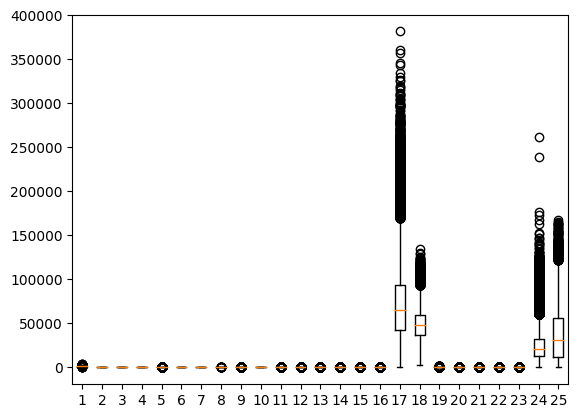

In [ ]:
plt.boxplot(bluegame.drop('gameId',axis = 1));

<Axes: >

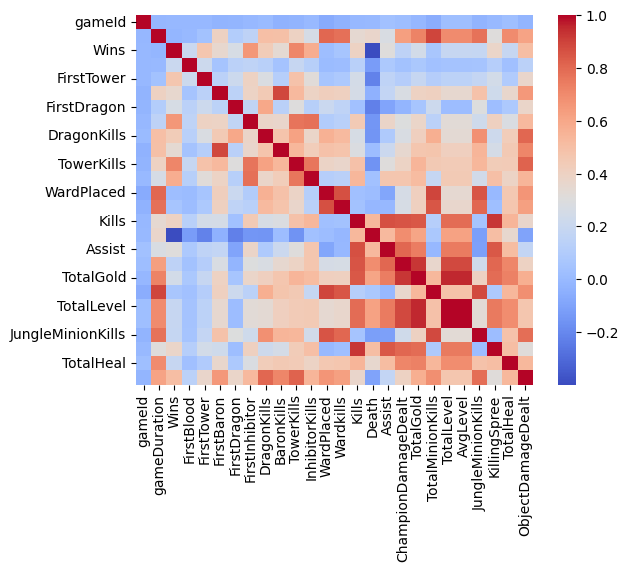

In [ ]:
sns.heatmap(bluegame.corr(), cmap='coolwarm', annot=False)

In [ ]:
durcorr = bluegame.corr()['gameDuration'].drop(bluegame.columns[(bluegame.nunique() == 2) | (bluegame.columns == 'gameDuration')])

In [ ]:
# 특성공학
  # 경기 시간과 연관성이 높은 열을 처리
def makefeature(df, column):
  df[f'{column} per sec'] = df[column] / df['gameDuration']
  df.drop(column, axis = 1, inplace = True)
for column in durcorr[durcorr > 0.2].index.tolist():
    makefeature(bluegame, column)
    makefeature(redgame, column)

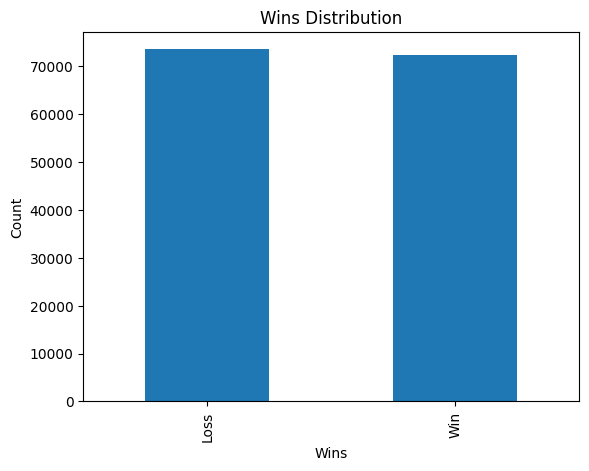

In [ ]:
bluegame['Wins'].value_counts().plot(kind='bar')
plt.title('Wins Distribution')
plt.xlabel('Wins')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
plt.show()

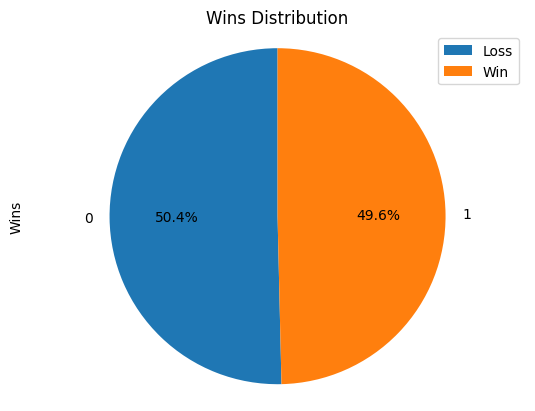

In [ ]:
bluegame['Wins'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Wins Distribution')
plt.axis('equal')
plt.legend(['Loss', 'Win'])
plt.show()

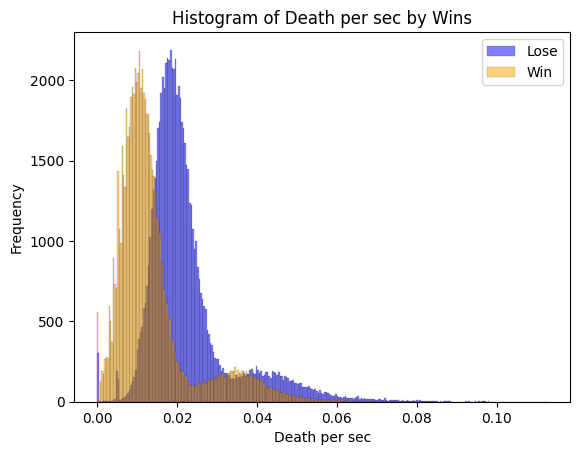

In [ ]:
sns.histplot(data=bluegame[bluegame['Wins']==0], x='Death per sec', color='blue', label='Lose', alpha=0.5)
sns.histplot(data=bluegame[bluegame['Wins']==1], x='Death per sec', color='orange', label='Win', alpha=0.5)
plt.title('Histogram of Death per sec by Wins')
plt.xlabel('Death per sec')
plt.ylabel('Frequency')
plt.legend()
plt.show()

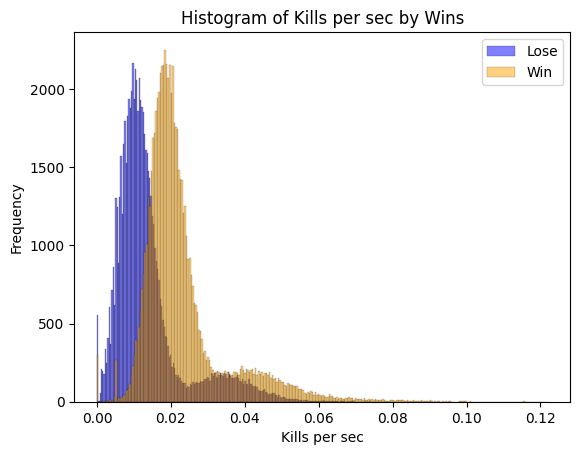

In [ ]:
sns.histplot(data=bluegame[bluegame['Wins']==0], x='Kills per sec', color='blue', label='Lose', alpha=0.5)
sns.histplot(data=bluegame[bluegame['Wins']==1], x='Kills per sec', color='orange', label='Win', alpha=0.5)
plt.title('Histogram of Kills per sec by Wins')
plt.xlabel('Kills per sec')
plt.ylabel('Frequency')
plt.legend()
plt.show()

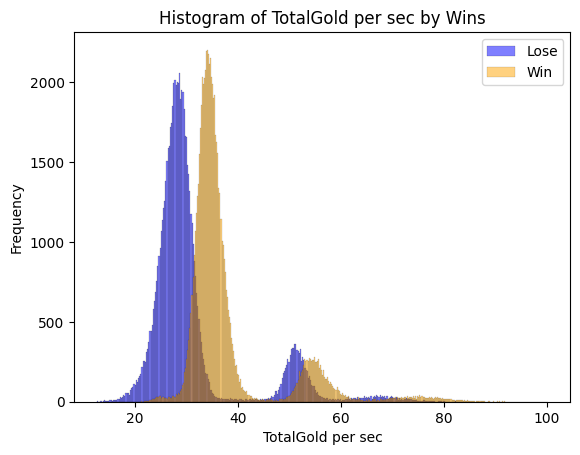

In [ ]:
sns.histplot(data=bluegame[bluegame['Wins']==0], x='TotalGold per sec', color='blue', label='Lose', alpha=0.5)
sns.histplot(data=bluegame[bluegame['Wins']==1], x='TotalGold per sec', color='orange', label='Win', alpha=0.5)
plt.title('Histogram of TotalGold per sec by Wins')
plt.xlabel('TotalGold per sec')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
bluegame.corr()

,gameId,gameDuration,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills per sec,BaronKills per sec,...,Assist per sec,ChampionDamageDealt per sec,TotalGold per sec,TotalMinionKills per sec,TotalLevel per sec,AvgLevel per sec,JungleMinionKills per sec,KillingSpree per sec,TotalHeal per sec,ObjectDamageDealt per sec
gameId,1.000000,-0.011231,-0.007641,-0.005317,-0.004938,-0.032007,-0.023204,-0.005191,0.000737,-0.039360,...,0.039151,0.026608,-0.004015,-0.089993,0.041688,0.041688,-0.045657,0.002876,0.038739,-0.036202
gameDuration,-0.011231,1.000000,-0.020543,0.000233,0.042552,0.403865,0.105030,0.152430,0.242359,0.424603,...,-0.106898,0.122554,-0.208555,0.246258,-0.603906,-0.603906,0.376107,-0.129378,0.323461,0.280497
Wins,-0.007641,-0.020543,1.000000,0.205219,0.466778,0.356001,0.264796,0.657303,0.499982,0.370494,...,0.298169,0.202456,0.328809,0.196161,0.213470,0.213470,0.271289,0.376763,0.275077,0.628173
FirstBlood,-0.005317,0.000233,0.205219,1.000000,0.217895,0.050896,0.137872,0.156387,0.162233,0.051265,...,0.092143,0.058455,0.109396,0.096132,0.054889,0.054889,0.080577,0.130489,0.057822,0.194886
FirstTower,-0.004938,0.042552,0.466778,0.217895,1.000000,0.139186,0.214916,0.394998,0.341473,0.135442,...,0.165621,0.137254,0.220220,0.207474,0.095414,0.095414,0.226270,0.256308,0.137344,0.471639
FirstBaron,-0.032007,0.403865,0.356001,0.050896,0.139186,1.000000,0.143436,0.393788,0.342379,0.919765,...,-0.004550,0.069003,0.023445,0.169392,-0.186365,-0.186365,0.357200,0.024672,0.231601,0.537946
FirstDragon,-0.023204,0.105030,0.264796,0.137872,0.214916,0.143436,1.000000,0.169315,0.679406,0.149497,...,-0.140022,-0.097460,-0.041715,0.328207,-0.145274,-0.145274,0.385667,-0.022384,0.053499,0.445338
FirstInhibitor,-0.005191,0.152430,0.657303,0.156387,0.394998,0.393788,0.169315,1.000000,0.358406,0.384038,...,0.315026,0.284495,0.311057,0.059138,0.127178,0.127178,0.176695,0.342662,0.298250,0.564447
DragonKills per sec,0.000737,0.242359,0.499982,0.162233,0.341473,0.342379,0.679406,0.358406,1.000000,0.357012,...,-0.116443,-0.033371,0.034566,0.450987,-0.178731,-0.178731,0.591259,0.048093,0.185515,0.761301
BaronKills per sec,-0.039360,0.424603,0.370494,0.051265,0.135442,0.919765,0.149497,0.384038,0.357012,1.000000,...,0.005176,0.097642,0.055473,0.171895,-0.172351,-0.172351,0.361121,0.044365,0.256606,0.579149


In [ ]:
# 필요없는 feature 삭제
bluegame.drop(['gameId', 'TotalLevel per sec'], axis=1, inplace=True)
redgame.drop(['gameId', 'TotalLevel per sec'], axis=1, inplace=True)

In [ ]:
y_train = bluegame['Wins']
x_train = bluegame.drop('Wins', axis = 1)
y_test = redgame['Wins']
x_test = redgame.drop('Wins', axis = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, stratify=y_train)

# 모델생성

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
dtc.fit(x_train, y_train)
rfc.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report

y_dtcpred = dtc.predict(x_val)
y_rfcpred = rfc.predict(x_val)
y_xgbpred = xgb.predict(x_val)

print('DecisionTreeClassifier',classification_report(y_val, y_dtcpred))
print('RandomForestClassifier',classification_report(y_val, y_rfcpred))
print('XGBClassifier',classification_report(y_val, y_xgbpred))

DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.96      0.96      0.96     18353
           1       0.96      0.96      0.96     18082

    accuracy                           0.96     36435
   macro avg       0.96      0.96      0.96     36435
weighted avg       0.96      0.96      0.96     36435

RandomForestClassifier               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18353
           1       0.97      0.98      0.97     18082

    accuracy                           0.97     36435
   macro avg       0.97      0.97      0.97     36435
weighted avg       0.97      0.97      0.97     36435

XGBClassifier               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18353
           1       0.97      0.98      0.97     18082

    accuracy                           0.97     36435
   macro avg       0.97      0.97      0.97     36435
weighted avg  

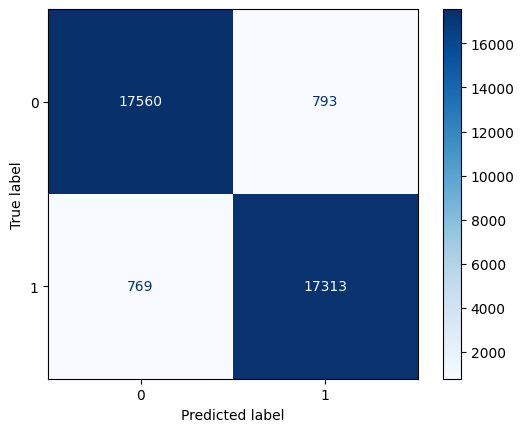

In [ ]:
cm = confusion_matrix(y_val, y_dtcpred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

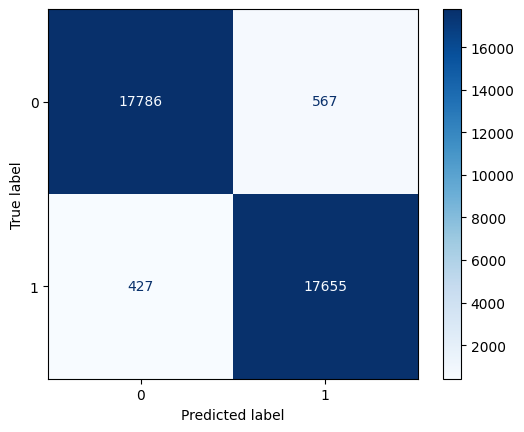

In [ ]:
cm = confusion_matrix(y_val, y_rfcpred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

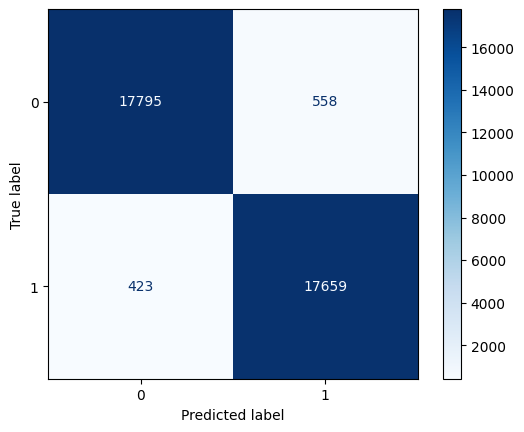

In [ ]:
cm = confusion_matrix(y_val, y_xgbpred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

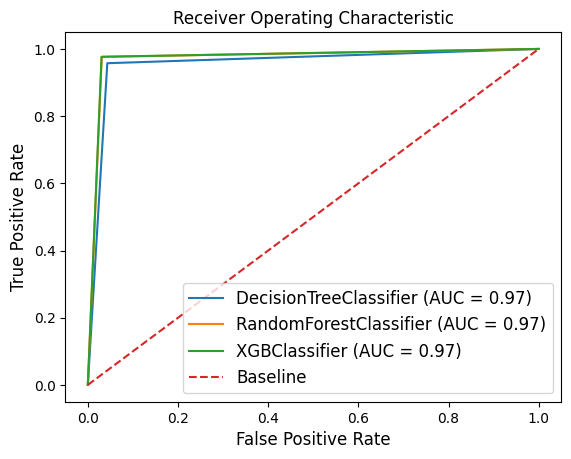

In [ ]:
auc_scoredtc = roc_auc_score(y_val, y_dtcpred)
fprdtc, tprdtc, _ = roc_curve(y_val, y_dtcpred)
auc_scorerfc = roc_auc_score(y_val, y_rfcpred)
fprrfc, tprrfc, _ = roc_curve(y_val, y_rfcpred)
auc_score = roc_auc_score(y_val, y_xgbpred)
fprxgb, tprxgb, _ = roc_curve(y_val, y_xgbpred)
baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))

model = [dtc, rfc, xgb]

plt.plot(fprdtc, tprdtc, label=f"{type(model[0]).__name__} (AUC = {auc_score:.2f})")
plt.plot(fprrfc, tprrfc, label=f"{type(model[1]).__name__} (AUC = {auc_score:.2f})")
plt.plot(fprxgb, tprxgb, label=f"{type(model[2]).__name__} (AUC = {auc_score:.2f})")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.legend(prop={"size": 12})
plt.show()

In [ ]:
# xgb = XGBClassifier(random_state=42, n_estimators=400)
# y_xgbpred = xgb.predict(x_val)
# 기본 모델 성능이 좋아 하이퍼파라미터 세팅은 작업 시간만 늘리고 모델 개선에 그리 큰 효율을 미치지 않아 파기

In [ ]:
y_pred = xgb.predict(x_test)
print('XGBClassifier',classification_report(y_test, y_pred))

XGBClassifier               precision    recall  f1-score   support

           0       0.98      0.97      0.97     72327
           1       0.97      0.98      0.98     73413

    accuracy                           0.98    145740
   macro avg       0.98      0.98      0.98    145740
weighted avg       0.98      0.98      0.98    145740



# 특성 중요도

In [ ]:
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    xgb,
    scoring='roc_auc',
    n_iter=5,
    random_state=42,
)
permuter.fit(x_val, y_xgbpred)

PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_threshold=64,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=6,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=42, ...),
                      random_state=42, scoring='roc_auc')

<BarContainer object of 23 artists>

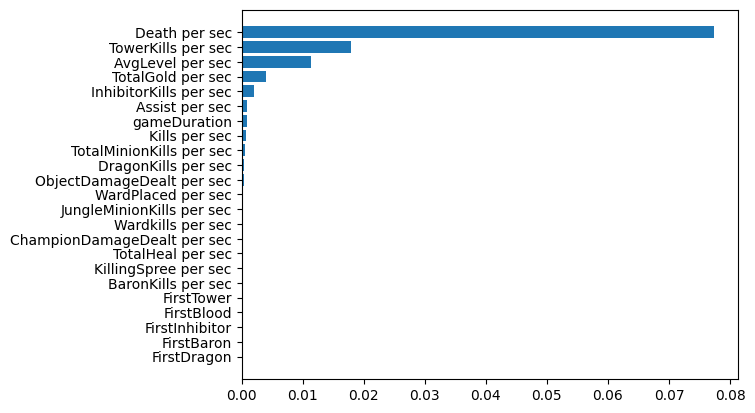

In [ ]:
eli5.show_weights(permuter, top=None, feature_names=x_val.columns.tolist())
p_i = sorted(
    list(zip(x_val.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
p_i = pd.DataFrame(p_i, columns=['Feature', 'Importance']).sort_values(by = 'Importance')
plt.barh(p_i.Feature, p_i.Importance)

In [ ]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=x_val.columns.tolist(),
)

Weight,Feature
0.0774 ± 0.0013,Death per sec
0.0180 ± 0.0009,TowerKills per sec
0.0114 ± 0.0002,AvgLevel per sec
0.0040 ± 0.0003,TotalGold per sec
0.0020 ± 0.0001,InhibitorKills per sec
0.0009 ± 0.0001,Assist per sec
0.0009 ± 0.0000,gameDuration
0.0006 ± 0.0001,Kills per sec
0.0005 ± 0.0000,TotalMinionKills per sec
0.0004 ± 0.0000,DragonKills per sec


In [ ]:
!pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


# 아이스 플롯

In [ ]:
def ice_plot(data, var, id, model) :
    temp = data.loc[[id]]
    var_values = data[var].sort_values().tolist()
    pred = []
    for v in var_values :
        temp[var] = v
        pred.append(model.predict_proba(temp)[0,1])

    plt.plot(var_values, pred, marker = '.')
    plt.grid()
    plt.show()

In [ ]:
temp = x_val.copy()
temp.reset_index(drop = True, inplace = True)
temp.loc[[177]]

,gameDuration,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills per sec,BaronKills per sec,TowerKills per sec,InhibitorKills per sec,...,Death per sec,Assist per sec,ChampionDamageDealt per sec,TotalGold per sec,TotalMinionKills per sec,AvgLevel per sec,JungleMinionKills per sec,KillingSpree per sec,TotalHeal per sec,ObjectDamageDealt per sec
177,1430,1,1,0,0,0,0.0,0.0,0.001399,0.0,...,0.023077,0.018881,47.985315,28.565734,0.307692,0.008112,0.06014,0.003497,10.141958,12.298601


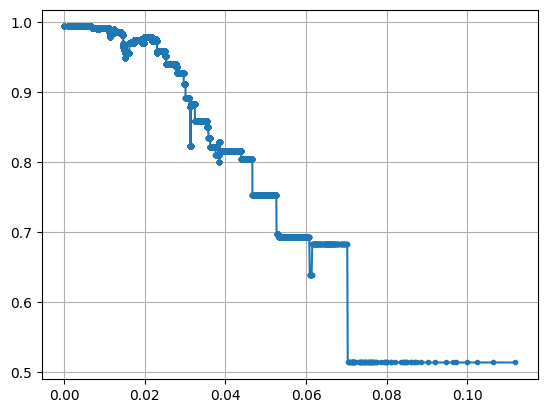

In [ ]:
ice_plot(temp, 'Death per sec', 156, xgb)

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='Death per sec'>})

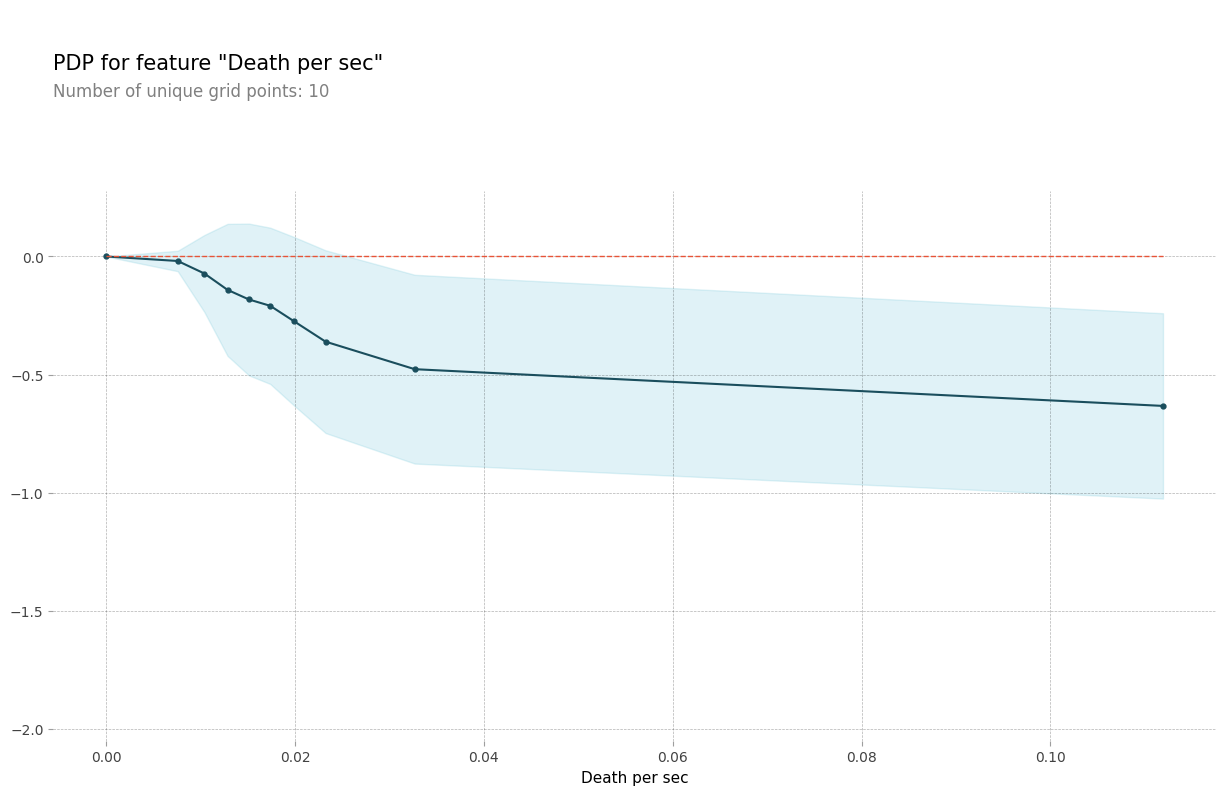

In [ ]:
import shap
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
var = "Death per sec"

isolated = pdp_isolate( xgb, dataset=x_val, model_features= x_val.columns,
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

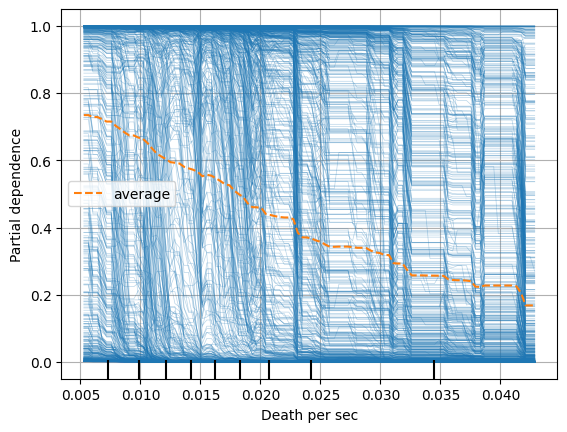

In [ ]:
var = 'Death per sec'

PartialDependenceDisplay.from_estimator(xgb, features = [var], X = x_val, kind = 'both')
plt.grid()
plt.show()

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='TowerKills per sec'>})

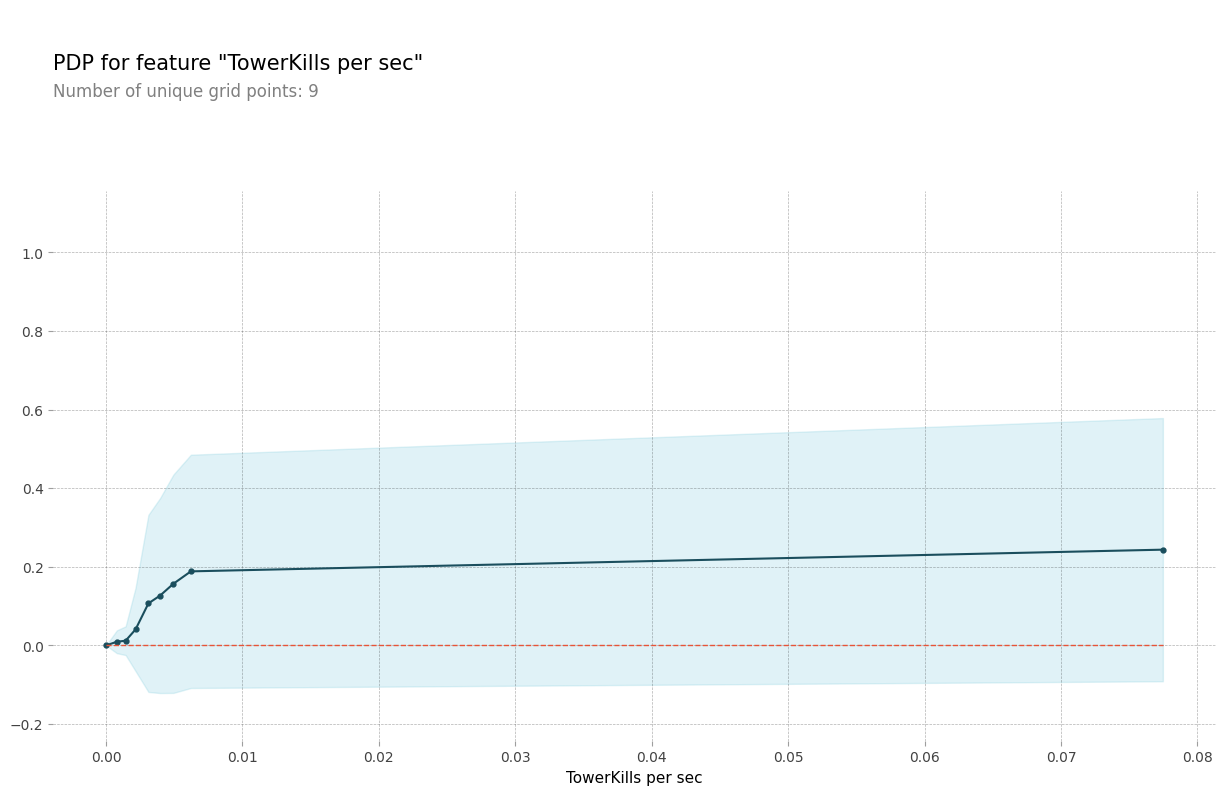

In [ ]:
var = "TowerKills per sec"

isolated = pdp_isolate( xgb, dataset=x_val, model_features= x_val.columns,
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

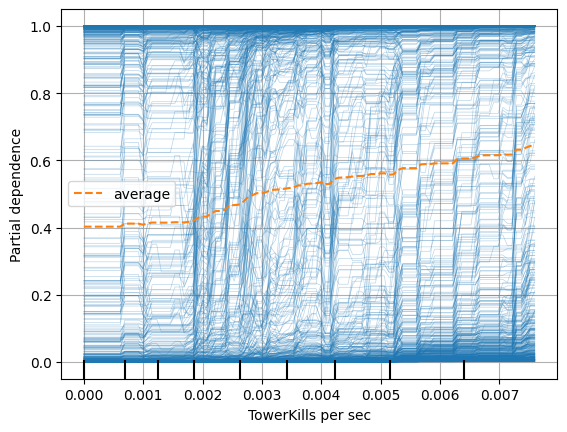

In [ ]:
PartialDependenceDisplay.from_estimator(xgb, features = [var], X = x_val, kind = 'both')
plt.grid()
plt.show()

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': <Axes: xlabel='gameDuration', ylabel='Death per sec'>})

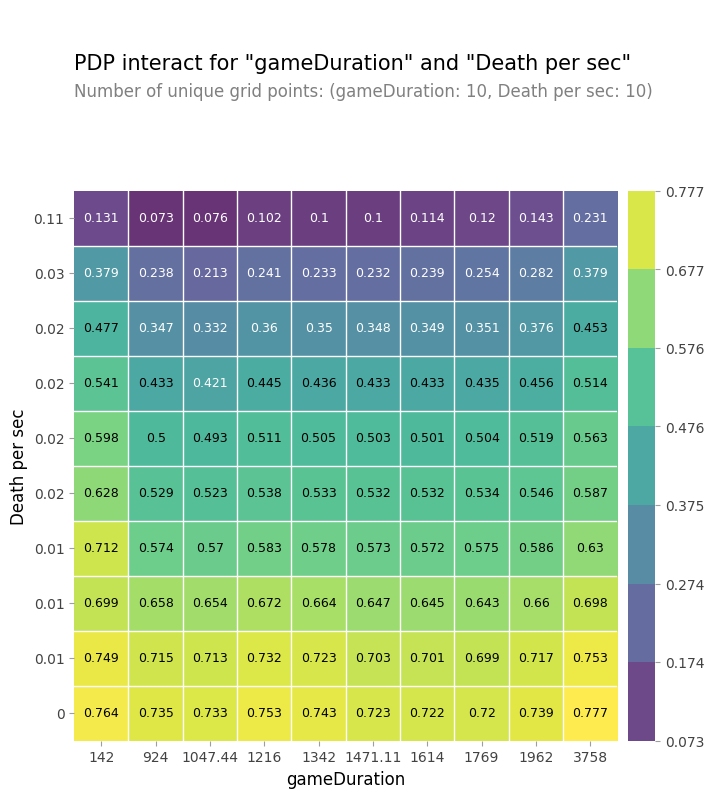

In [ ]:
vars = ['gameDuration', 'Death per sec']

interaction = pdp_interact(xgb, dataset= x_val, model_features= list(x_val),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)

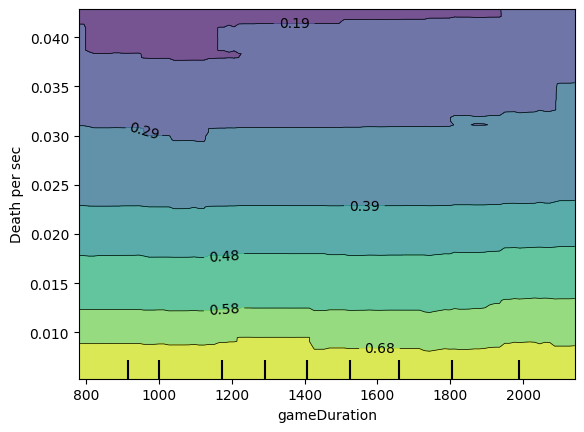

In [ ]:
PartialDependenceDisplay.from_estimator(xgb, features = [('gameDuration', 'Death per sec')], X = x_val)
plt.show()

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': <Axes: xlabel='gameDuration', ylabel='Kills per sec'>})

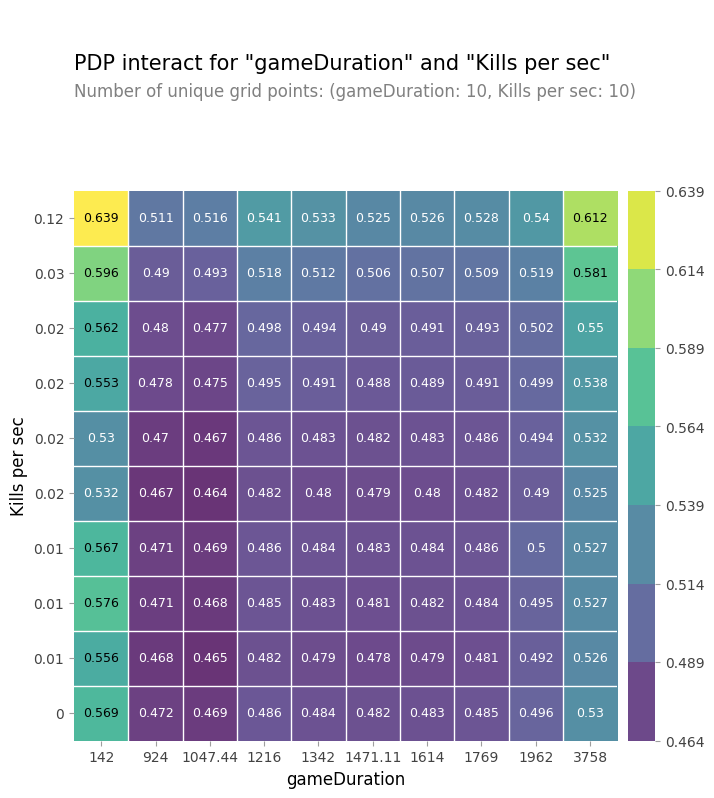

In [ ]:
vars = ['gameDuration', 'Kills per sec']

interaction = pdp_interact(xgb, dataset= x_val, model_features= list(x_val),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)

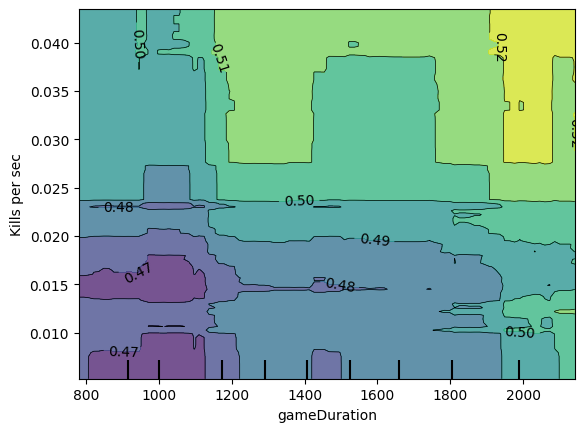

In [ ]:
PartialDependenceDisplay.from_estimator(xgb, features = [('gameDuration', 'Kills per sec')], X = x_val)
plt.show()

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': <Axes: xlabel='gameDuration', ylabel='TotalGold per sec'>})

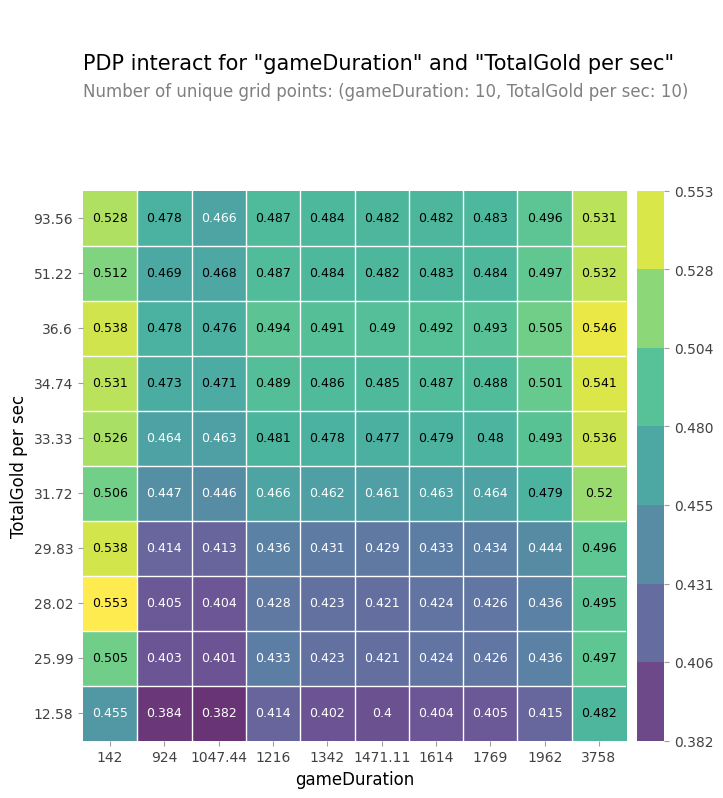

In [ ]:
vars = ['gameDuration', 'TotalGold per sec']

interaction = pdp_interact(xgb, dataset= x_val, model_features= list(x_val),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)

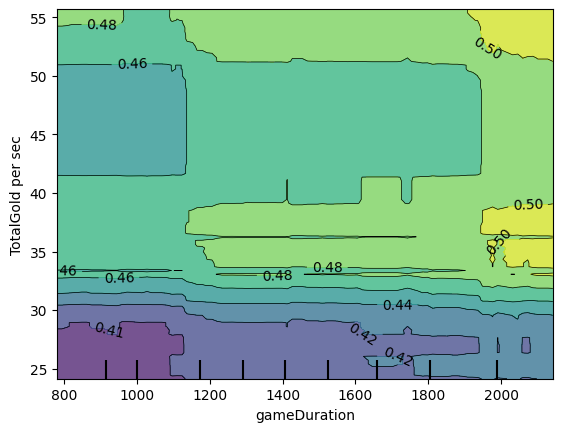

In [ ]:
PartialDependenceDisplay.from_estimator(xgb, features = [('gameDuration', 'TotalGold per sec')], X = x_val)
plt.show()